In [1]:
import pandas as pd
import numpy as np
#load the dataset
restaurant=pd.read_csv('NYC Restaurants.txt', sep=' ', engine='python')
restaurant.head()

,Restaurant,Price,Food,Decor,Service,Location
1,Daniella Ristorante,43,22,18,20,West
2,Tello's Ristorante,32,20,19,19,West
3,Biricchino,34,21,13,18,West
4,Bottino,41,20,20,17,West
5,Da Umberto,54,24,19,21,West


In [2]:
restaurant.shape

(168, 6)

In [3]:
restaurant.describe()

,Price,Food,Decor,Service
count,168.000000,168.000000,168.000000,168.00000
mean,42.696429,20.595238,17.690476,19.39881
std,9.292814,1.982674,2.702743,2.11394
min,19.000000,16.000000,6.000000,14.00000
25%,36.000000,19.000000,16.000000,18.00000
50%,43.000000,20.500000,18.000000,20.00000
75%,50.000000,22.000000,19.000000,21.00000
max,65.000000,25.000000,25.000000,24.00000


In [4]:
restaurant.isnull().sum()

Restaurant    0
Price         0
Food          0
Decor         0
Service       0
Location      0
dtype: int64

In [5]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 1 to 168
Data columns (total 6 columns):
Restaurant    168 non-null object
Price         168 non-null int64
Food          168 non-null int64
Decor         168 non-null int64
Service       168 non-null int64
Location      168 non-null object
dtypes: int64(4), object(2)
memory usage: 9.2+ KB


In [6]:
set(restaurant.Location)

{'East', 'West'}

In [7]:
# change categorical variable to dummy variables
location = pd.get_dummies(restaurant.Location, prefix='Location_')
location.head()

,Location__East,Location__West
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1


In [8]:
# final data set for modeling
restaurant = pd.concat([restaurant.drop('Location',1),location[location.columns[1:]]],axis=1)
restaurant.head()

,Restaurant,Price,Food,Decor,Service,Location__West
1,Daniella Ristorante,43,22,18,20,1
2,Tello's Ristorante,32,20,19,19,1
3,Biricchino,34,21,13,18,1
4,Bottino,41,20,20,17,1
5,Da Umberto,54,24,19,21,1


In [9]:
# define x and y
X=restaurant[['Food', 'Decor', 'Service', 'Location__West']]
y=restaurant['Price']

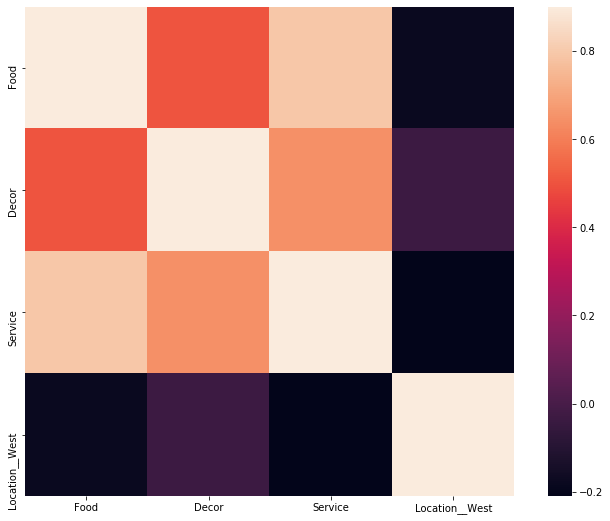

In [10]:
# check multicolinearity of predictors
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
corrmat = X.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [11]:
# fit the model
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(X, y)
print ("R^2 :")
print (ols.score(X, y)) #R2

R^2 :
0.6278809367791338


In [12]:
# coefficient
ols.coef_

array([ 1.53811994,  1.91008711, -0.00272748, -2.06805016])

In [13]:
#intercept
ols.intercept_ 

-21.955749514000118

In [14]:
# combine the result
colnames = ['Food', 'Decor', 'Service', 'Location__West']
result = pd.DataFrame(ols.coef_).transpose()
result.columns = colnames
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

,coefficient
Food,1.538120
Decor,1.910087
Service,-0.002727
Location__West,-2.068050
intercept,-21.955750


In [15]:
y_pred=ols.predict(X)

In [16]:
# RSE
import math
rse=math.sqrt(np.sum((ols.predict(X)-y)**2)/(X.shape[0]-X.shape[1]-1))
print('RSE=',rse)

RSE= 5.737895616483671


In [17]:
# VIF
cc = np.corrcoef(X, rowvar=False)
VIF = np.linalg.inv(cc)
VIF.diagonal() 

array([2.71426117, 1.74485106, 3.55873476, 1.06498465])

In [18]:
vif=pd.DataFrame(X.columns,columns=['Feature'])
vif['VIF']=VIF.diagonal() 
vif
# all vifs are below 5

,Feature,VIF
0,Food,2.714261
1,Decor,1.744851
2,Service,3.558735
3,Location__West,1.064985


In [19]:
# check p value of each coeffcient and overall model
# adjusted r2, aic, bic
import statsmodels.api as sm

In [20]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     68.76
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           5.35e-34
Time:                        10:24:03   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1069.
Df Residuals:                     163   BIC:                             1084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -21.9557      4.858     -4.

/Users/shuozhang/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [21]:
# service coeffcient is not significant based on p value

In [63]:
# drop service
# re-define x and y
X=restaurant[['Food', 'Decor', 'Location__West']]
Y=restaurant['Price']

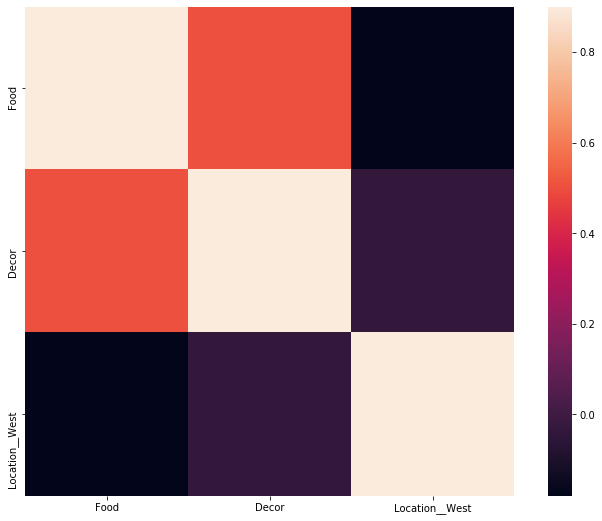

In [64]:
corrmat = X.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [65]:
# fit the model
from sklearn import linear_model
ols = linear_model.LinearRegression()
ols.fit(X, y)
print ("R^2:",)
print (ols.score(X, y))

R^2:
0.6278808286060671


In [66]:
colnames = ['Food', 'Decor',  'Location__West']
result = pd.DataFrame(ols.coef_).transpose()
result.columns = colnames
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

,coefficient
Food,1.536346
Decor,1.909373
Location__West,-2.067013
intercept,-21.959867


In [67]:
y_pred=ols.predict(X)

In [68]:
# RSE
rse=math.sqrt(np.sum((ols.predict(X)-y)**2)/(X.shape[0]-X.shape[1]-1))
print('RSE=',rse) # lower than before

RSE= 5.720376115066385


In [69]:
# VIF
cc = np.corrcoef(X, rowvar=False)
VIF = np.linalg.inv(cc)
vif=pd.DataFrame(X.columns,columns=['Feature'])
vif['VIF']=VIF.diagonal() 
vif

,Feature,VIF
0,Food,1.389515
1,Decor,1.346030
2,Location__West,1.038000


In [70]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     92.24
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           5.10e-35
Time:                        10:31:09   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1067.
Df Residuals:                     164   BIC:                             1079.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -21.9599      4.806     -4.

/Users/shuozhang/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [71]:
est2.aic

1066.7105698491928

In [72]:
est2.bic

1079.2064257668058

In [30]:
# adjusted r2 is higher than before, aic is lower than before, a better model

In [31]:
# bic is lower than before

In [32]:
# let's try to drop location

In [33]:
X=restaurant[['Food', 'Decor']]
Y=restaurant['Price']

In [34]:
ols = linear_model.LinearRegression()
ols.fit(X, y)
print ("R^2:",)
print (ols.score(X, y))

R^2:
0.6167156378634243


In [35]:
y_pred=ols.predict(X)

In [36]:
# RSE
rse=math.sqrt(np.sum((ols.predict(X)-y)**2)/(X.shape[0]-X.shape[1]-1))
print('RSE=',rse) # higher than before

RSE= 5.787940583618005


In [37]:
# VIF
cc = np.corrcoef(X, rowvar=False)
VIF = np.linalg.inv(cc)
vif=pd.DataFrame(X.columns,columns=['Feature'])
vif['VIF']=VIF.diagonal() 
vif

,Feature,VIF
0,Food,1.340359
1,Decor,1.340359


In [38]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     132.7
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           4.37e-35
Time:                        10:24:12   Log-Likelihood:                -531.84
No. Observations:                 168   AIC:                             1070.
Df Residuals:                     165   BIC:                             1079.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.5002      4.723     -5.187      0.0

/Users/shuozhang/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [60]:
est2.aic

1069.677156772353

In [62]:
est2.bic #1079.20 drop service

1079.0490487105628

In [39]:
# adjusted r2 is lower, aic is higher, RSE is higher, a poorer model

In [40]:
# bic is lower as before

In [41]:
# for stepwise regression, please read this link: https://planspace.org/20150423-forward_selection_with_statsmodels/

In [42]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj # AIC,BIC
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [43]:
data=restaurant[['Food', 'Decor', 'Service', 'Location__West','Price']]

In [44]:
model = forward_selected(data, 'Price')

In [45]:
print(model.model.formula)

Price ~ Decor + Food + Location__West + 1


In [46]:
print(model.rsquared_adj)

0.6210737705927636


In [47]:
# drop service for a better fit

In [55]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().aic # AIC,BIC
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [56]:
print(model.model.formula)

Price ~ Decor + Food + Location__West + 1


In [75]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().bic # AIC,BIC
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [76]:
print(model.model.formula)

Price ~ Decor + Food + Location__West + 1
